In [118]:
# “Python-Based Recipe Analytics System”

# **Objective:**  
# Scrape recipe data from AllRecipes.com, clean and structure the dataset, analyze recipe popularity, cooking times, and ingredient trends, and visualize the findings using Python.

# **Tools Used:**  
# - Python  
# - Requests & BeautifulSoup (Web Scraping)  
# - Pandas (Data Cleaning & Analysis)  
# - Matplotlib & Seaborn (Visualization)  
# - Collections (Ingredient Analysis)


In [143]:
# Importing required libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter


In [145]:
# URL of the recipe category to scrape
url = "https://www.allrecipes.com/recipes/76/appetizers-and-snacks/"

# Headers to mimic a browser visit
headers = {"User-Agent": "Mozilla/5.0"}


In [147]:
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

cards = soup.find_all("a", class_="mntl-card-list-items")


In [149]:
data = []

for card in cards[:30]:
    text = card.get_text(strip=True)

    rating_match = re.search(r'(\d+)\s*Ratings?', text)
    rating = rating_match.group(1) if rating_match else "N/A"

    name = re.sub(r'\d+\s*Ratings?', '', text).strip()
    data.append([name, rating])


In [151]:
df = pd.DataFrame(data, columns=["Recipe Name", "Rating Count"])
df


,Recipe Name,Rating Count
0,"This 5-Ingredient Dip Is So Good, I Always Dou...",N/A
1,Our 28 Cheesiest Dip Recipes of All Time,N/A
2,Our 10 Best Creative Nacho Recipes,N/A
3,Traditional Mexican Guacamole,200
4,Deviled Eggs,N/A
5,Stuffed Mushrooms,N/A
6,Cheese Balls,N/A
7,Salsa,N/A
8,Guacamole,N/A
9,14 Easy Finger Food Recipes for the Super Bowl,N/A


In [153]:
df_clean = df[df["Rating Count"] != "N/A"].copy()
df_clean["Rating Count"] = df_clean["Rating Count"].astype(int)
df_clean.reset_index(drop=True, inplace=True)
df_clean


,Recipe Name,Rating Count
0,Traditional Mexican Guacamole,200
1,Loaded Baked Potato Bites,2
2,3-Ingredient Cottage Cheese Bites,1
3,Hot Honey Saltines,1
4,Puff Pastry Pizza Poppers,1
5,Air Fryer Kielbasa Bites,1
6,Spinach Feta Crescent Rolls—Only 3 Ingredients!,1


In [155]:
df.to_csv("recipes.csv", index=False)


In [157]:
# Convert the 'Rating Count' column to numeric values
df["Rating Count"] = pd.to_numeric(df["Rating Count"], errors="coerce")

#Remove rows with missing values (NaN) after conversion
df.dropna(inplace=True)

# Reset the DataFrame index after dropping rows
df.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
df


,Recipe Name,Rating Count
0,Traditional Mexican Guacamole,200.0
1,Loaded Baked Potato Bites,2.0
2,3-Ingredient Cottage Cheese Bites,1.0
3,Hot Honey Saltines,1.0
4,Puff Pastry Pizza Poppers,1.0
5,Air Fryer Kielbasa Bites,1.0
6,Spinach Feta Crescent Rolls—Only 3 Ingredients!,1.0


In [159]:
# Display the top 10 recipes based on Rating Count (most popular recipes)
df.sort_values(by="Rating Count", ascending=False).head(10)


,Recipe Name,Rating Count
0,Traditional Mexican Guacamole,200.0
1,Loaded Baked Potato Bites,2.0
2,3-Ingredient Cottage Cheese Bites,1.0
3,Hot Honey Saltines,1.0
4,Puff Pastry Pizza Poppers,1.0
5,Air Fryer Kielbasa Bites,1.0
6,Spinach Feta Crescent Rolls—Only 3 Ingredients!,1.0


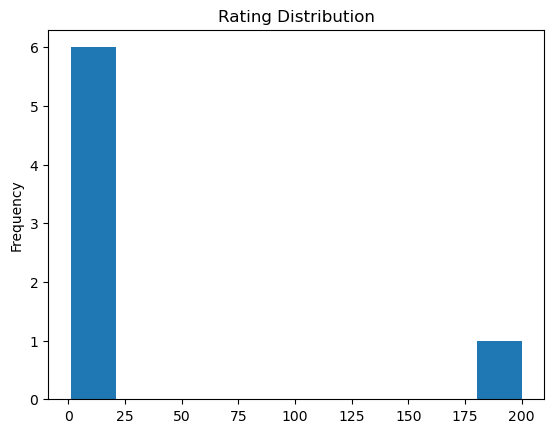

In [161]:
# Plot a histogram of the 'Rating Count' to visualize the distribution of recipe popularity
# This helps to understand how ratings are spread across the scraped recipes
df["Rating Count"].plot(kind="hist")
plt.title("Rating Distribution")
plt.show()


In [165]:
data = {
    "Recipe Name": ["Pasta", "Salad"],
    "Ingredients": [["tomato", "onion", "cheese"], ["onion", "cucumber", "tomato"]],
    "Cooking Time": [30, 10],
    "Rating": [4.5, 4.0],
    "Cuisine": ["Italian", "Healthy"]
}

df = pd.DataFrame(data)
df


,Recipe Name,Ingredients,Cooking Time,Rating,Cuisine
0,Pasta,"[tomato, onion, cheese]",30,4.5,Italian
1,Salad,"[onion, cucumber, tomato]",10,4.0,Healthy


In [102]:
# Create a sample structured dataset of recipes
# This includes recipe names, ingredients (as lists), cooking time, rating, and cuisine type
# This format allows ingredient analysis, cuisine-based analysis, and other data insight
import pandas as pd

data = {
    "Recipe Name": ["Pasta", "Salad"],
    "Ingredients": [["tomato", "onion", "cheese"], ["onion", "cucumber", "tomato"]],
    "Cooking Time": [30, 10],
    "Rating": [4.5, 4.0],
    "Cuisine": ["Italian", "Healthy"]
}

df = pd.DataFrame(data)
df


,Recipe Name,Ingredients,Cooking Time,Rating,Cuisine
0,Pasta,"[tomato, onion, cheese]",30,4.5,Italian
1,Salad,"[onion, cucumber, tomato]",10,4.0,Healthy


In [167]:
# Flatten the list of ingredients from all recipes
# Count the frequency of each ingredient across all recipes
# Display the 10 most common ingredients
all_ingredients = [i for sub in df["Ingredients"] for i in sub]
Counter(all_ingredients).most_common(10)


[('tomato', 2), ('onion', 2), ('cheese', 1), ('cucumber', 1)]

In [106]:
# Calculate the average cooking time for each cuisine type
# This helps to compare which cuisines are faster or slower to prepare
df.groupby("Cuisine")["Cooking Time"].mean()


Cuisine
Healthy    10.0
Italian    30.0
Name: Cooking Time, dtype: float64

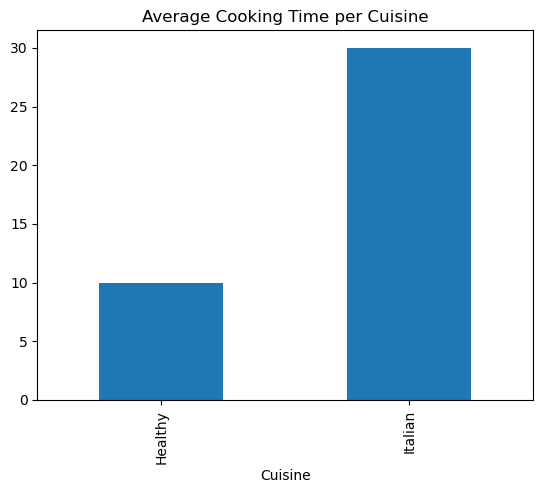

In [169]:
# Visualize the average cooking time for each cuisine using a bar chart
# This makes it easy to compare which cuisines take longer or shorter to prepare
df.groupby("Cuisine")["Cooking Time"].mean().plot(kind="bar")
plt.title("Average Cooking Time per Cuisine")
plt.show()


In [171]:
# Categorize recipes into popularity levels based on their rating count
# 'Low' = 1–5 ratings, 'Medium' = 6–50 ratings, 'High' = 51–500 ratings
# This helps in analyzing and visualizing recipe popularity trends
df_clean["Popularity Level"] = pd.cut(
    df_clean["Rating Count"],
    bins=[0, 5, 50, 500],
    labels=["Low", "Medium", "High"]
)


In [173]:
# Display the cleaned recipes along with their rating count and assigned popularity level
# This allows us to see which recipes are Low, Medium, or High in popularity
df_clean[["Recipe Name", "Rating Count", "Popularity Level"]]


,Recipe Name,Rating Count,Popularity Level
0,Traditional Mexican Guacamole,200,High
1,Loaded Baked Potato Bites,2,Low
2,3-Ingredient Cottage Cheese Bites,1,Low
3,Hot Honey Saltines,1,Low
4,Puff Pastry Pizza Poppers,1,Low
5,Air Fryer Kielbasa Bites,1,Low
6,Spinach Feta Crescent Rolls—Only 3 Ingredients!,1,Low


In [175]:
# Count the number of recipes in each popularity level (Low, Medium, High)
# This helps to understand how many recipes fall into each category
df_clean["Popularity Level"].value_counts()


Popularity Level
Low       6
High      1
Medium    0
Name: count, dtype: int64

In [177]:
# Combine all recipe names into a single string and split into individual words
# Convert to lowercase for uniformity
# Count the frequency of each word and display the 10 most common words
# This helps identify popular ingredients or recipe types from the titles
words = " ".join(df_clean["Recipe Name"]).lower().split()
common_words = Counter(words).most_common(10)
common_words


[('bites', 3),
 ('traditional', 1),
 ('mexican', 1),
 ('guacamole', 1),
 ('loaded', 1),
 ('baked', 1),
 ('potato', 1),
 ('3-ingredient', 1),
 ('cottage', 1),
 ('cheese', 1)]

In [179]:
# Create a summary of key recipe metrics:
# - Total number of recipes
# - Average rating count across all recipes
# - Most popular recipe based on rating count
# Save this summary as a CSV file for reporting or future reference

summary = {
    "Total Recipes": len(df_clean),
    "Average Rating Count": df_clean["Rating Count"].mean(),
    "Most Popular Recipe": df_clean.sort_values(by="Rating Count", ascending=False).iloc[0]["Recipe Name"]
}

pd.DataFrame(summary.items(), columns=["Metric", "Value"]).to_csv("analysis_summary.csv", index=False)


In [181]:
# Convert the summary dictionary into a DataFrame and display it
# This allows us to view key metrics like total recipes, average ratings, and most popular recipe directly in Jupyter
summary_df = pd.DataFrame(summary.items(), columns=["Metric", "Value"])
summary_df  # this will display the DataFrame in Jupyter


,Metric,Value
0,Total Recipes,7
1,Average Rating Count,29.571429
2,Most Popular Recipe,Traditional Mexican Guacamole
